In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel('data\Online_Retail_Clear.xlsx')
dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
#Veri setinde ihtiyacimiz olan sutunlari sec
dataset = dataset[['CustomerID','StockCode','InvoiceNo','InvoiceDate','Quantity','UnitPrice']]
dataset


,CustomerID,StockCode,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,17850,85123A,536365,2010-12-01 08:26:00,6,2.55
1,17850,71053,536365,2010-12-01 08:26:00,6,3.39
2,17850,84406B,536365,2010-12-01 08:26:00,8,2.75
3,17850,84029G,536365,2010-12-01 08:26:00,6,3.39
4,17850,84029E,536365,2010-12-01 08:26:00,6,3.39
...,...,...,...,...,...,...
406821,12680,22613,581587,2011-12-09 12:50:00,12,0.85
406822,12680,22899,581587,2011-12-09 12:50:00,6,2.10
406823,12680,23254,581587,2011-12-09 12:50:00,4,4.15
406824,12680,23255,581587,2011-12-09 12:50:00,4,4.15


In [4]:
#Quant'ty satirlarini pozitif yap
dataset['Quantity'] = dataset['Quantity'].abs()


In [5]:
df_sorted = dataset.sort_values(['CustomerID', 'InvoiceDate'], ascending=[True, False])
df_grouped = df_sorted.groupby('CustomerID').first().reset_index()
df_grouped

,CustomerID,StockCode,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,12346,23166,C541433,2011-01-18 10:17:00,74215,1.04
1,12347,23497,581180,2011-12-07 15:52:00,12,1.45
2,12348,23077,568172,2011-09-25 13:13:00,120,1.25
3,12349,23112,577609,2011-11-21 09:51:00,2,7.50
4,12350,21908,543037,2011-02-02 16:01:00,12,2.10
...,...,...,...,...,...,...
4367,18280,82484,545712,2011-03-07 09:52:00,3,7.90
4368,18281,22037,556464,2011-06-12 10:53:00,12,0.42
4369,18282,22423,580173,2011-12-02 11:43:00,2,12.75
4370,18283,22587,580872,2011-12-06 12:02:00,1,0.85


In [6]:
#fatura tarihine gore sirala
df_grouped.sort_values('InvoiceDate', ascending=False)


,CustomerID,StockCode,InvoiceNo,InvoiceDate,Quantity,UnitPrice
275,12680,22631,581587,2011-12-09 12:50:00,12,1.95
587,13113,22061,581586,2011-12-09 12:49:00,8,2.95
2562,15804,22481,581585,2011-12-09 12:31:00,12,0.39
1067,13777,20832,581584,2011-12-09 12:25:00,72,0.72
3854,17581,23552,581582,2011-12-09 12:21:00,6,2.08
...,...,...,...,...,...,...
3129,16583,21889,536420,2010-12-01 12:03:00,12,1.25
4096,17908,90199C,536409,2010-12-01 11:45:00,3,6.35
359,12791,22867,536403,2010-12-01 11:27:00,96,1.85
1046,13747,22180,536393,2010-12-01 10:37:00,8,9.95


In [7]:
#Veri seti eski oldugu icin referans bir tarih seciyoruz.
ref_date = pd.to_datetime('2011-12-14 00:00:00')

In [8]:
#Recency hesaplamasi
difference = ref_date - df_grouped['InvoiceDate']
df_grouped['Recency'] = difference.dt.days



In [9]:
rfm_receny = df_grouped[['CustomerID','Recency']]
rfm = rfm_receny.copy()

RFM analizinde "frequency" (sıklık) değeri, müşterinin belirli bir zaman aralığında yaptığı satın alma işlemlerinin sayısını ifade eder. Her bir müşteri için, InvoiceNo (fatura numarası) sütunundaki benzersiz değerlerin sayısı, yani farklı fatura numaralarının sayısı sıklık değerini verecektir.

In [10]:
frequency = dataset.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

frequency = dataset.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']


In [11]:
rfm = pd.merge(rfm, frequency, on='CustomerID')
rfm

,CustomerID,Recency,Frequency
0,12346,329,2
1,12347,6,7
2,12348,79,4
3,12349,22,1
4,12350,314,1
...,...,...,...
4367,18280,281,1
4368,18281,184,1
4369,18282,11,3
4370,18283,7,16


In [12]:
monetary_df = dataset.groupby('CustomerID')[['Quantity', 'UnitPrice']].sum()
monetary_df['Monetary'] = monetary_df['Quantity'] * monetary_df['UnitPrice']

In [13]:
monetary_df

,Quantity,UnitPrice,Monetary
CustomerID,,,
12346,148430,2.08,308734.40
12347,2458,481.21,1182814.18
12348,2341,178.71,418360.11
12349,631,605.10,381818.10
12350,197,65.30,12864.10
...,...,...,...
18280,45,47.65,2144.25
18281,54,39.36,2125.44
18282,108,62.68,6769.44


In [14]:
rfm = pd.merge(rfm, monetary_df['Monetary'], on='CustomerID')
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,329,2,308734.40
1,12347,6,7,1182814.18
2,12348,79,4,418360.11
3,12349,22,1,381818.10
4,12350,314,1,12864.10
...,...,...,...,...
4367,18280,281,1,2144.25
4368,18281,184,1,2125.44
4369,18282,11,3,6769.44
4370,18283,7,16,1705639.21


In [15]:
rfm.to_excel('data\RFM.xlsx', index=False)

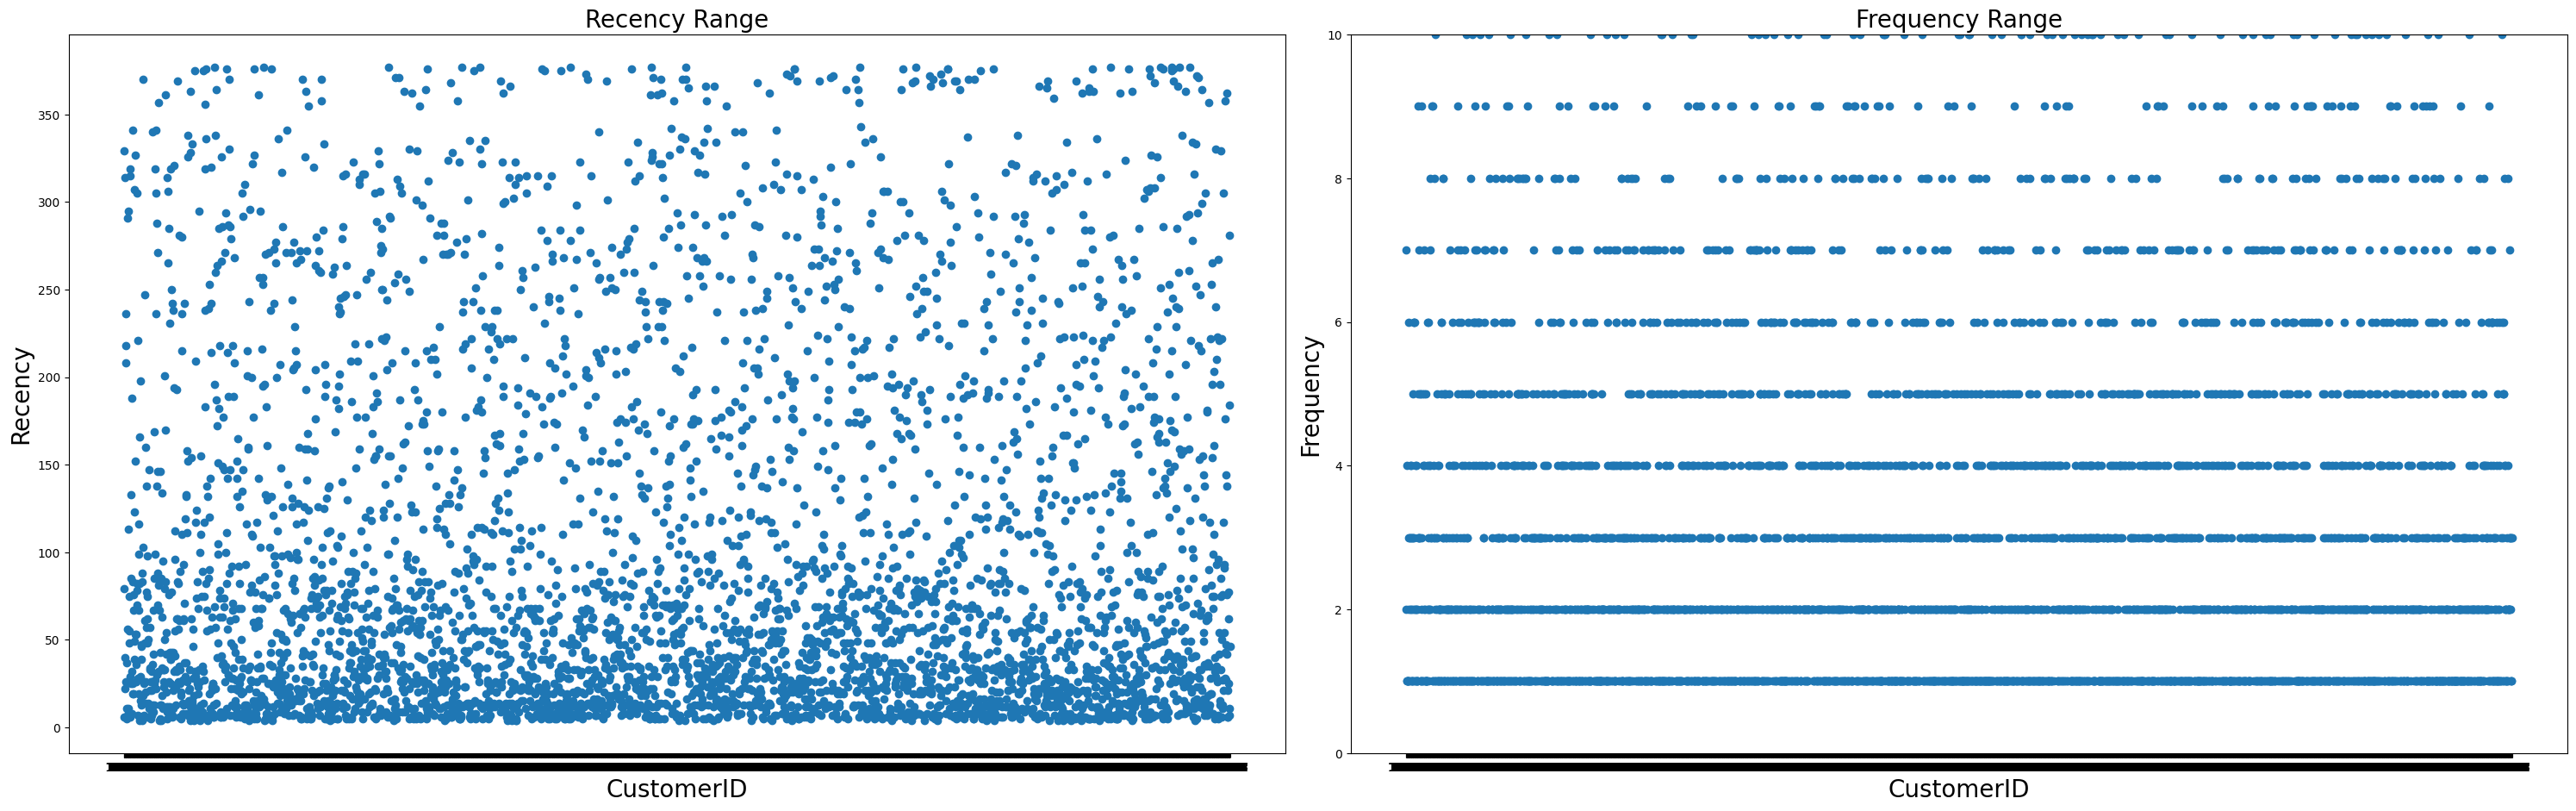

In [16]:

df = pd.DataFrame(rfm)

# Değer aralıklarını görselleştirme
plt.figure(figsize=(30, 18))  # Grafik boyutunu ayarlayabilirsiniz

plt.subplot(2, 2, 1)
plt.scatter(range(len(df)), df['Recency'])
plt.xticks(range(len(df)), df['CustomerID'])
plt.xlabel('CustomerID', fontdict={'fontsize': 20})
plt.ylabel('Recency', fontdict={'fontsize': 20})
plt.title('Recency Range', fontdict={'fontsize': 20})

plt.subplot(2, 2, 2)
plt.scatter(range(len(df)), df['Frequency'])
plt.xticks(range(len(df)), df['CustomerID'])
plt.xlabel('CustomerID', fontdict={'fontsize': 20})
plt.ylabel('Frequency', fontdict={'fontsize': 20})
plt.title('Frequency Range', fontdict={'fontsize': 20})
plt.ylim(0, 10) 

plt.tight_layout()
plt.show()

2551078.0451374874


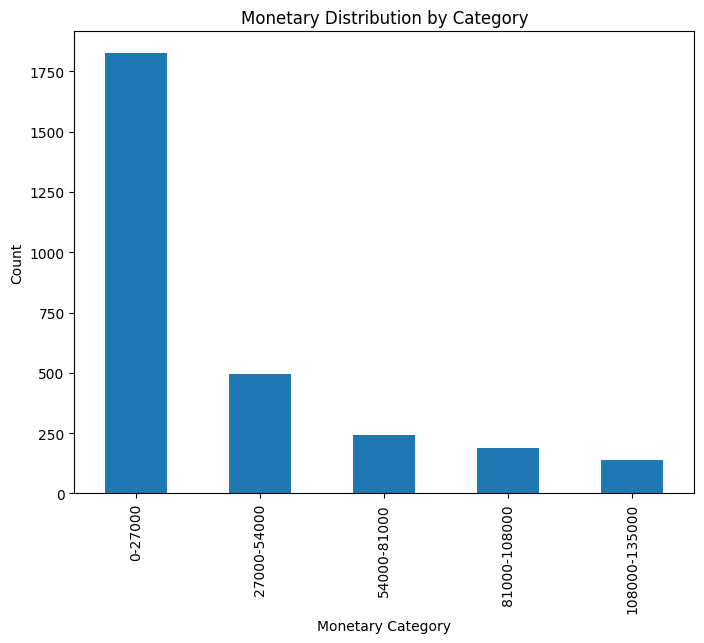

In [17]:
# Min ve max değerleri belirleyin
min_value = 0
max_value = 135000
print(df['Monetary'].sum()/df['Monetary'].count())
# Aralıkları hesaplayın
interval = (max_value - min_value) / 5

# Aralık sınırlarını oluşturun
bins = [min_value + interval * i for i in range(6)]
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(5)]

# 'Monetary' değerlerini aralıklara göre kategorilere ayırın
df['Monetary_Category'] = pd.cut(df['Monetary'], bins=bins, labels=labels, include_lowest=True)

# Kategoriye göre sayıları hesaplayın
counts_by_category = df['Monetary_Category'].value_counts()

# Çubuk grafiğini oluşturun
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlayabilirsiniz

counts_by_category.plot(kind='bar')

plt.title('Monetary Distribution by Category')
plt.xlabel('Monetary Category')
plt.ylabel('Count')

plt.show()

In [18]:
scores = pd.DataFrame(rfm['CustomerID'])

scores['RecencyScore'] = pd.cut(df['Recency'], bins=[-1, 50, 100, 200,300, float('inf')], labels=[5, 4, 3, 2,1])
scores['FrequencyScore'] = pd.cut(df['Frequency'], bins=[-1, 2, 4, 6,8, float('inf')], labels=[5, 4, 3, 2,1])
scores['MonetaryScore'] = pd.cut(df['Monetary'], bins=[-1, 27000, 54000, 81000,108000, float('inf')], labels=[1, 2, 3, 4,5])
scores['RFMGroup'] = scores['RecencyScore'].astype(str) + scores['FrequencyScore'].astype(str) + scores['MonetaryScore'].astype(str)
scores['RFMGroup'] = scores['RFMGroup'].astype(int)
scores


,CustomerID,RecencyScore,FrequencyScore,MonetaryScore,RFMGroup
0,12346,1,5,5,155
1,12347,5,2,5,525
2,12348,4,4,5,445
3,12349,5,5,5,555
4,12350,1,5,1,151
...,...,...,...,...,...
4367,18280,2,5,1,251
4368,18281,3,5,1,351
4369,18282,5,4,1,541
4370,18283,5,1,5,515


In [19]:
segments = {
    555: 'Champions',
    554: 'Loyal_Customers',
    151: 'Potential_Loyalists',
    251: 'Fresh_Visitors',
    515: 'Recent_Rich_Customers',
    451: 'Promising',
    444: 'Need_Attention',
    341: 'About_toSleep',
    333: 'At_Risk',
    151: 'Fukara',
    111: 'Lost',
}
scores['RFMSegment'] = scores['RFMGroup'].map(segments)
scores.sort_values('RFMGroup', ascending=False)
scores.to_csv('data\RFM_Scores.csv', index=False)


In [20]:
value_counts = scores['RFMGroup'].value_counts()
value_counts.head(30).sort_values(ascending=False)

515    544
551    405
251    348
451    309
351    285
151    237
535    232
545    209
525    182
552    107
542     80
541     80
445     73
435     64
452     64
352     50
341     48
543     48
555     46
345     45
441     44
425     43
415     41
442     39
544     36
453     34
553     33
342     31
252     30
335     29
Name: RFMGroup, dtype: int64